In [6]:
import matplotlib.pyplot as plt
import matplotlib as cm
import numpy as np

In [7]:
#Assign the block scores to a cube
cubeFull = np.load('block_score_nodeScore_46.npy')
print(np.shape(cubeFull))
#Sort the IDs
cubeFull = cubeFull[cubeFull[:, 0].argsort()]
#Reshape the importance scores and make a separate cube
n_blocks_dim = 64
block_size = 8
cube = np.zeros((n_blocks_dim, n_blocks_dim, n_blocks_dim))

for bid in range(np.shape(cubeFull)[0]):
    
    bid_test = int(bid)
    Z = bid_test//(n_blocks_dim*n_blocks_dim)
    bid_test = bid_test % (n_blocks_dim*n_blocks_dim)  
    Y = bid_test//(n_blocks_dim)
    bid_test = bid_test % (n_blocks_dim)   
    X = bid_test % (n_blocks_dim)
    
    #print(X,Y,Z)
    #print(bid)
    
    cube[X,Y,Z] = cubeFull[bid, 3]    

(262144, 516)


In [8]:
n_blocks_dim = 64
block_size = 8
cubeGT = np.zeros((n_blocks_dim, n_blocks_dim, n_blocks_dim))

for bid in range(np.shape(cubeFull)[0]):
    
    bid_test = int(bid)
    Z = bid_test//(n_blocks_dim*n_blocks_dim)
    bid_test = bid_test % (n_blocks_dim*n_blocks_dim)  
    Y = bid_test//(n_blocks_dim)
    bid_test = bid_test % (n_blocks_dim)   
    X = bid_test % (n_blocks_dim)
    
    #print(X,Y,Z)
    #print(bid)
    
    cubeGT[X,Y,Z] = cubeFull[bid, 1]   

In [9]:
#Color map the values. Reds cmap: Higher 
mapping = plt.get_cmap('Reds')
colors = mapping(cube)

#colorsGT =np.zeros((64, 64, 64, 4))
colors[cubeGT[:, :, :]==1, :] = np.array([0, 1, 0, 1])
#colorsGT[cubeGT[:, :, :]== 1, :] = np.array([1, 0, 0, 1])

#Set Alpha for transparency
colors[:, :, :, 3] = 0.3
#colors[cube[:, :, :]>0.8, :] = np.array([0, 0, 0, 0])
#colors[cube[:, :, :]<=0.8, :] = np.array([0, 0, 0, 0])
#colors[cube[:, :, :]<=0.4, :] = np.array([1, 1, 1, 0])


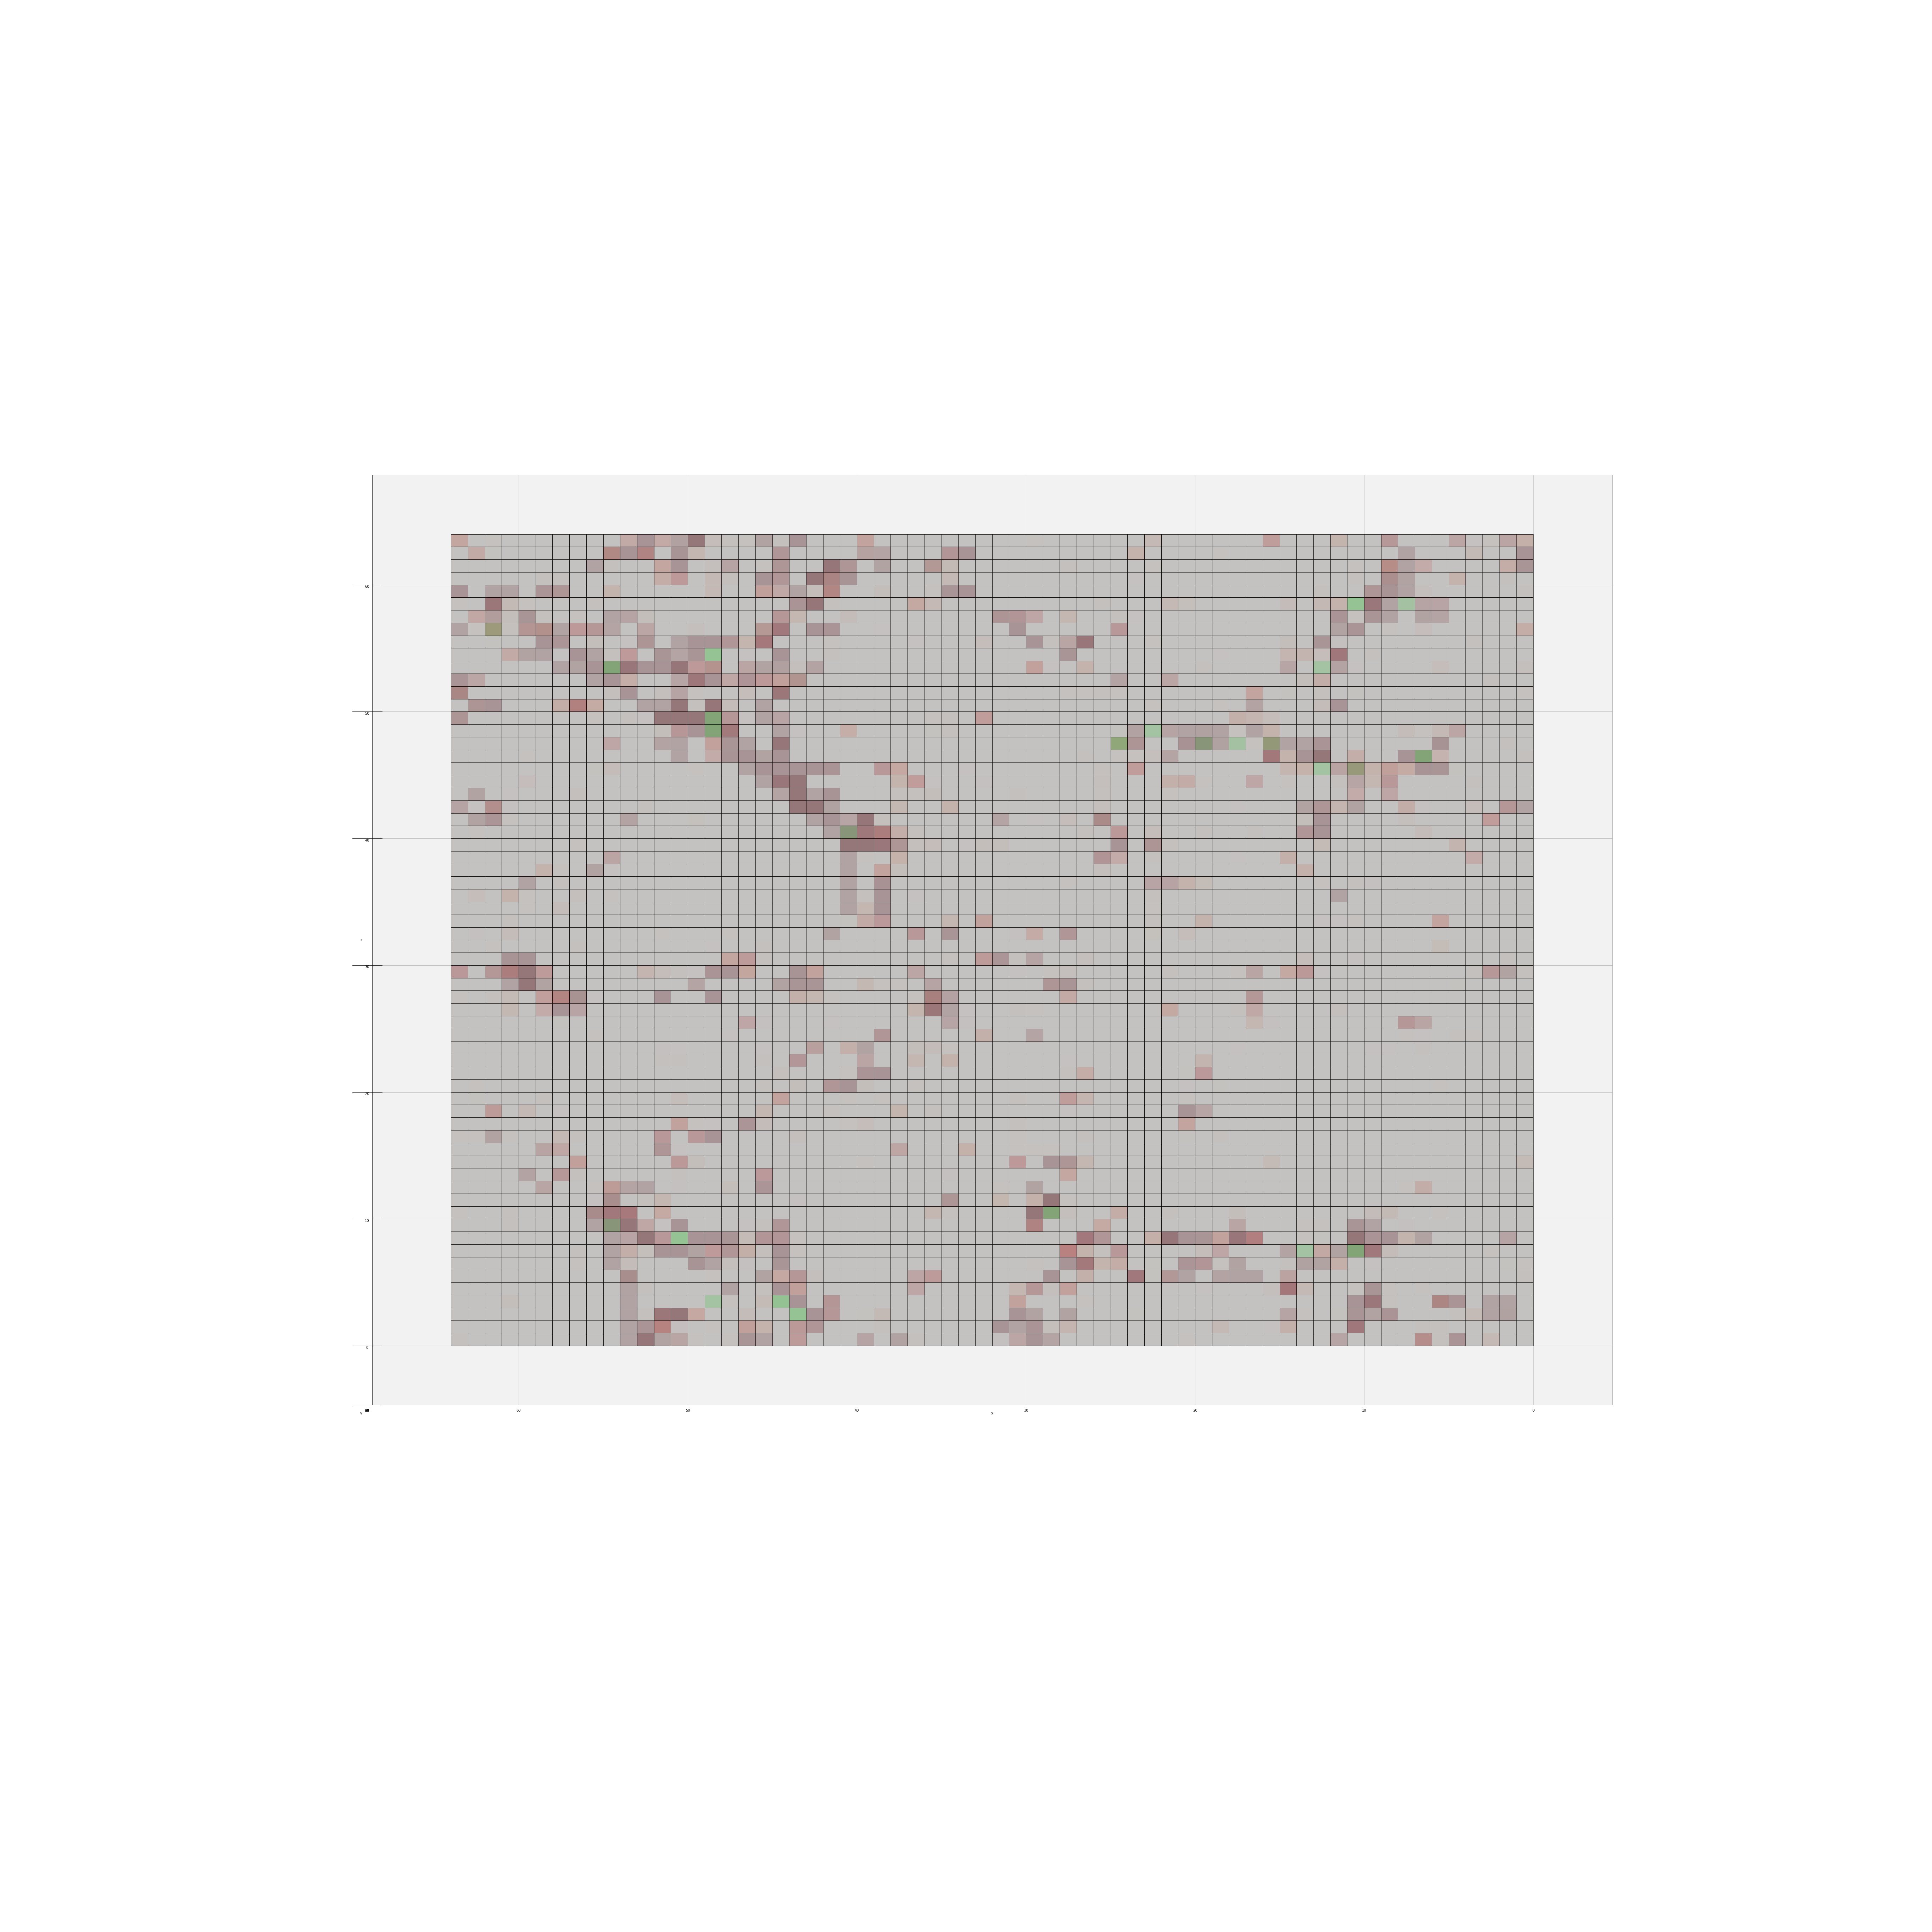

In [13]:
# and plot everything
x, y, z = np.indices((65, 65, 65))
ax = plt.figure(figsize=(100,100)).add_subplot(projection='3d', proj_type='ortho')
ax.voxels(x,y,z, cube,
          facecolors=colors,
          edgecolor='black',
          linewidth=0.5)
ax.set(xlabel='x', ylabel='y', zlabel='z')

ax.view_init(0,90) 
plt.show()